# **Time Series - Fbprophet**

## ***Import Libraries and Dataset***

In [ ]:
import pandas as pd
from prophet import Prophet

In [30]:
data = pd.read_csv('UNRATE.csv')
data.head(3)

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0


## ***Cleaning***

In [21]:
data['DATE'] = pd.to_datetime(data['DATE'],format='%Y-%m-%d')
data['UNRATE'] = pd.to_numeric(data['UNRATE'], errors='coerce')

In [22]:
data.columns = ['ds', 'y']

## ***Pre-processing***

In [93]:
# Convert DATE column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Validation period
validation_period = 15
train = data.iloc[:-validation_period]
validation = data.iloc[-validation_period:]


In [94]:
train.columns = ['ds', 'y']  # Prophet expects columns named 'ds' for dates and 'y' for values
validation.columns = ['ds', 'y']  # Rename columns for validation data as well


## ***Model***


Facebook **Prophet** is an open-source forecasting tool developed by Facebook's Core Data Science team. It is designed to make time series forecasting accessible to non-experts by providing a simple and intuitive interface while also incorporating advanced forecasting techniques.

In [95]:
# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_mode="additive")

# Fit the model
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1cc60mnx/ilcvk4d0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1cc60mnx/hb5a8mmx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44971', 'data', 'file=/tmp/tmp1cc60mnx/ilcvk4d0.json', 'init=/tmp/tmp1cc60mnx/hb5a8mmx.json', 'output', 'file=/tmp/tmp1cc60mnx/prophet_modeld10ekr_z/prophet_model-20240419205512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:55:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:55:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [96]:
# Forecast for the validation period
forecast = model.predict(validation)
forecast[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2023-01-01,3.648306,7.466847,5.541087
1,2023-02-01,3.821210,7.592660,5.628418
2,2023-03-01,4.120116,7.699951,5.866406
3,2023-04-01,3.963309,7.633654,5.688298
4,2023-05-01,3.928009,7.633319,5.706441
5,2023-06-01,3.621934,7.502009,5.627308
6,2023-07-01,3.781254,7.611337,5.604948
7,2023-08-01,3.742243,7.664932,5.687343
8,2023-09-01,3.680818,7.531665,5.609845
9,2023-10-01,3.687677,7.527067,5.575251


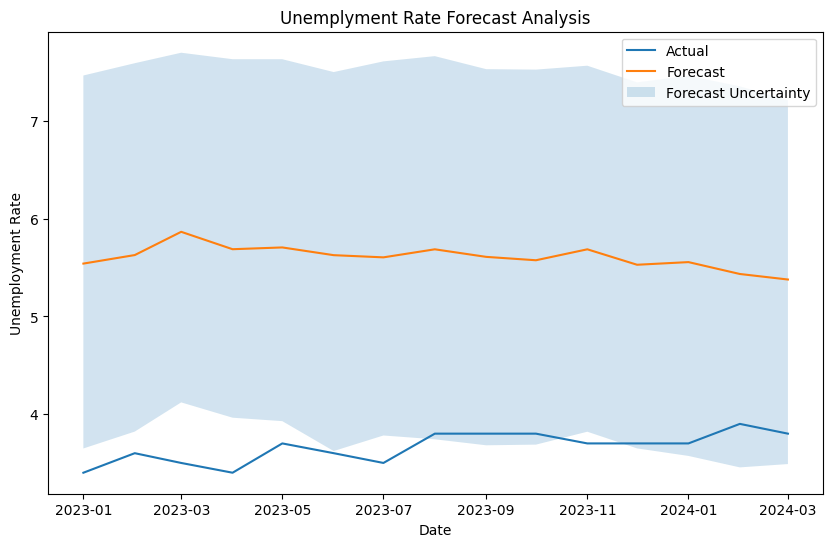

In [99]:
# Plotting predictions and uncertainty interval with respect to actuals
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))

# Plot actuals
plt.plot(validation.ds, validation.y, label="Actual")

# Plot forecasts
plt.plot(forecast.ds, forecast.yhat, label="Forecast")

# Plot uncertainty - lower and upper bound for the forecasts
plt.fill_between(forecast.ds, forecast.yhat_lower, forecast.yhat_upper, alpha=0.2, label="Forecast Uncertainty")

plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.title("Unemplyment Rate Forecast Analysis")
plt.show()

## ***Evaluation***

In [98]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(validation['y'], forecast['yhat']))

print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.9609007146517423


## ***Conclusion***

A Root Mean Squared Error (RMSE) of approximately 1.96 suggests that the forecasted values from the Facebook Prophet model have an average error of around 1.96 units when compared to the actual values.